# 05-clustering-&-association-rule-mining

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


___ 
## 1. Business Understanding

### Part 1
- Objective: Through the given ``drone_cust_locations`` dataset consisting x and y coordinates finding optimal locations for three drone depots, using the k-means clustering.
- The Dataset contains three columns: ``clientid``, ``x``, ``y``. Clients numerical Id value and the clients location with x- and y-coordinates.


### Part 2
- Objective: Through the given ``drone_prod_groups` dataset find interesting relationships between the product groups it consists of. Reporting clear recommendations how the company should use the resutls of the association rule mining to increase its revenue.
- The Dataset contains ``ID`` - the transaction ID, and ``Prod1, ..., Prod20`` binary variables indicating whether at least one product from a particular group was purchased in the transaction. A value of 1 indicates that at least one product from the group was purchased, while a value of 0 indicates that no products from the group were purchased.


___ 
## 2. Data Understanding

#### 2.1 ``drone_cust_locations.csv `` This dataset contains the locations of customers. The dataset has the following columns:

- clientid - The unique identifier for the customer
- x - The x coordinate of the customer's location, when plotted into a 2D plane
- y - The y coordinate of the customer's location, when plotted into a 2D plane

In [138]:
drone_cust_locations = pd.read_csv('../datasets/drone_cust_locations.csv', sep=';')

drone_cust_locations.head()

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298


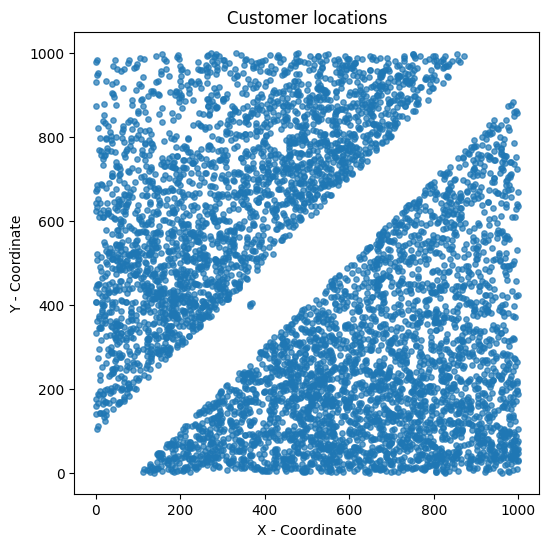

In [139]:
x_coords = drone_cust_locations["x"]
y_coords = drone_cust_locations["y"]

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, s=15, alpha=0.7)
plt.xlabel("X - Coordinate")
plt.ylabel("Y - Coordinate")
plt.title("Customer locations")
plt.show()

#### 2.2 ``drone_prod_groups.csv`` This dataset contains the sales data for products. The dataset has the following columns:

- ID - The transaction ID
- Prod1, ..., Prod20 - Binary variables indicating whether at least one product from a particular group was purchased in the transaction. A value of 1 indicates that at least one product from the group was purchased, while a value of 0 indicates that no products from the group were purchased.

In [140]:
drone_prod_groups = pd.read_csv('../datasets/drone_prod_groups.csv')
drone_prod_groups.head()

,ID,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,...,Prod11,Prod12,Prod13,Prod14,Prod15,Prod16,Prod17,Prod18,Prod19,Prod20
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,1,1
2,3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,4,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,5,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1


___ 
## 3. Data Preparation

### 3.1 Clustering

In [141]:
# DF for modeling (removes the id column)
X = drone_cust_locations[['x', 'y']]
print(f"Number or NaN values:\n{X.isna().sum()}")

print(X.head(5))

Number or NaN values:
x    0
y    0
dtype: int64
            x           y
0  622.771572  164.857623
1  416.357298  630.193634
2  292.735020  567.333231
3  737.211288  166.225676
4  540.475375  682.912298


### 3.2 Association

___ 
## 4. Modeling

### 4.1 Clustering

Silhouette score: 0.42
Silhouette score: 0.42
Silhouette score: 0.40
Silhouette score: 0.42
Silhouette score: 0.40
Silhouette score: 0.39
Silhouette score: 0.39
Silhouette score: 0.39
Silhouette score: 0.37


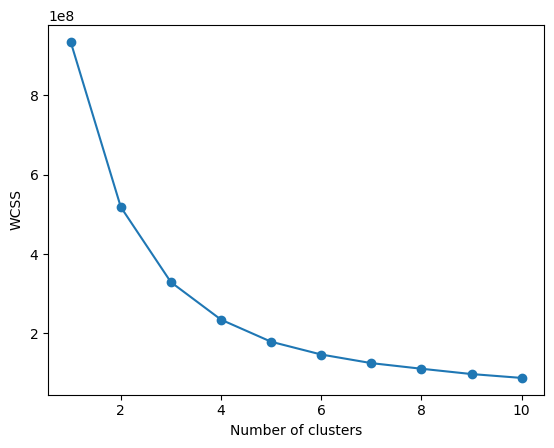

In [142]:
wcss = []

for i in range(1, 11):
    model = KMeans(init='random', n_clusters=i, random_state=123).fit(X)
    if i > 1:
        labels = model.labels_
        print(f"Silhouette score: {silhouette_score(X, labels):.2f}")
    
    wcss.append(model.inertia_)
    
plt.plot(range(1, 11), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [143]:
k = 3
model = KMeans(init='random', n_clusters=k, random_state=123).fit(X)
depot_labels = {
    0: "A",
    1: "B",
    2: "C"
}

drone_cust_locations["nearest_depot"] = model.labels_
drone_cust_locations["nearest_depot"] = drone_cust_locations["nearest_depot"].map(depot_labels)

drone_cust_locations.head(10)

,clientid,x,y,nearest_depot
0,1,622.771572,164.857623,B
1,2,416.357298,630.193634,C
2,3,292.735020,567.333231,A
3,4,737.211288,166.225676,B
4,5,540.475375,682.912298,C
5,6,535.469492,318.439661,B
6,7,640.380050,870.833221,C
7,8,235.772075,359.048203,A
8,9,481.896884,661.491838,C
9,10,730.032789,312.177817,B


In [144]:
drone_depots = pd.DataFrame(model.cluster_centers_, columns=["x", "y"])
drone_depots.index = pd.Index([depot_labels[i] for i in range(len(drone_depots))], name="depot_id")

print("Depot Locations")
drone_depots

Depot Locations


,x,y
depot_id,,
A,194.798554,392.577662
B,697.701861,208.357600
C,555.301076,785.462268


### 4.2 Association

___ 
## 5. Evaluation

### 5.1 Clustering

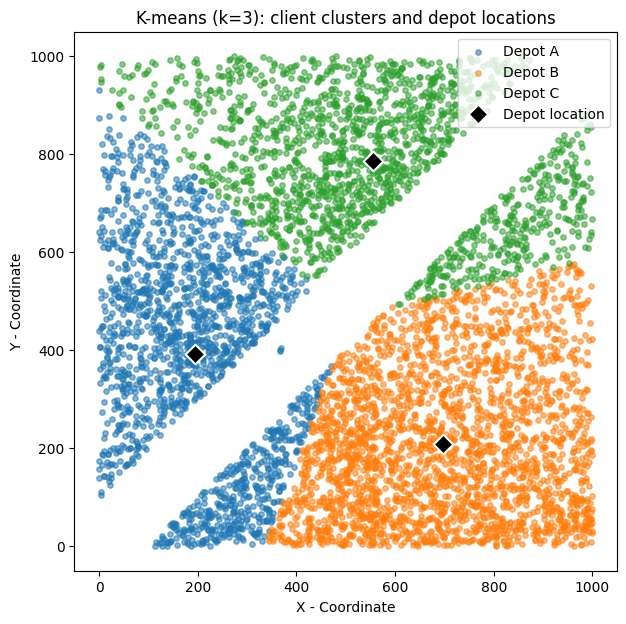

In [145]:
labels_num = model.labels_
labels_txt = pd.Series(labels_num).map(depot_labels)

plt.figure(figsize=(7, 7))

for depot_id in sorted(labels_txt.unique()):
    mapped_label = labels_txt == depot_id
    plt.scatter(
        drone_cust_locations.loc[mapped_label, "x"],
        drone_cust_locations.loc[mapped_label, "y"],
        s=15,
        alpha=0.55,
        label=f"Depot {depot_id}"
    )

centroids = model.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c="black", s=100, marker="D",
    edgecolor="white", linewidth=1.5,
    label="Depot location"
)
plt.xlabel("X - Coordinate")
plt.ylabel("Y - Coordinate")
plt.title("K-means (k=3): client clusters and depot locations")
plt.legend()
plt.show()
plt.show()

In [146]:
print(f"Clients per drone depot")
drone_cust_locations["nearest_depot"].value_counts().sort_index()

Clients per drone depot


nearest_depot
A    1756
B    2501
C    1699
Name: count, dtype: int64

### 5.2 Association

___ 
## 6. Deployment